## Desenvolvimento de modelo para detecção de fake news

### Importando as bibliotecas

In [2]:
import os
import pandas as pd
import numpy as np
import string
import nltk
import pickle
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Download stopwords

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fabricio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Carregando noticias verdadeiras

In [5]:
# Load data true
dataTRUE = "Data/size_normalized_texts/true/"

list = os.listdir(dataTRUE)
number_files_true = len(list)

#### Carregando noticias falsas

In [6]:
# Load data Fake
dataFAKE = "Data/size_normalized_texts/fake/"

list = os.listdir(dataTRUE)
number_files_fake = len(list)

#### Add label: 0 - Fake | 1 - Verdadeira

In [7]:
TEXT = []
LABEL = []

In [8]:
# Load data true
for i in range(number_files_true):
    title = list[i]
    LABEL.append(1)
    with open(dataTRUE + title,'r') as reader:

        doc = reader.read()
        doc.lower()
        doc.split()
        reader.close
        TEXT.append(doc)

In [9]:
# Load data fake
for i in range(number_files_fake):
    title = list[i]
    LABEL.append(0)
    with open(dataFAKE + title,'r') as reader:

        doc = reader.read()
        doc.lower()
        doc.split()
        reader.close
        TEXT.append(doc)

#### Verificando total de noticias

In [10]:
print(f"True {number_files_true}")
print(f"Fake {number_files_fake}")

True 3600
Fake 3600


In [11]:
assert len(TEXT) == len(LABEL)

In [12]:
print(f"Label {len(LABEL)} - TEXT {len(TEXT)}")

Label 7200 - TEXT 7200


#### Treinando modelo com algoritimo ML Logistic Regression

In [13]:
def vectors_and_df(text, label):
    """
    cria vetores para os arquivos de texto e retorna dataframe com artigos como vetores de palavras 
    """
    
    cv = TfidfVectorizer()
    cv.fit(text)
    corpus_vecs = cv.transform(text)
    
    return pd.DataFrame(corpus_vecs.todense(), index=label, 
                        columns=cv.get_feature_names()), cv

In [14]:
# Store results into dataframe, keep cv for later prediction
df, cv = vectors_and_df(TEXT, LABEL)

#### Separando dados para treinamento

In [15]:
X = df
y = df.index

#### Instancia do classificador ML Random Forest Classifier

In [16]:
model_rfc = RandomForestClassifier()
forest = RandomForestClassifier()

#### Treinando modelo com train test split

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

#### Treinando modelo com cross validation

In [26]:
acuracias = cross_val_score(model_rfc, X, y, cv=5, scoring="accuracy")

print("Accuracy :", np.mean(acuracias))#### Média Acurácia

In [94]:
print("Accuracy :", np.mean(acuracias))

Accuracy : 1.0


#### Treinando modelo Random Forest Classifier - Cross Validation

In [28]:
model_rfc.fit(Xtrain, ytrain)

RandomForestClassifier()

#### Treinando modelo Random Forest Classifier - Train Test Split

In [18]:
forest.fit(Xtrain, ytrain)

RandomForestClassifier()

#### Testando modelo com dados de teste

In [29]:
y_pred_rfc = model_rfc.predict(Xtest)

In [19]:
y_pred = forest.predict(Xtest)

### Verificando Métricas

In [30]:
accuracy_score(ytest, y_pred_rfc)

0.8643518518518518

In [20]:
accuracy_score(ytest, y_pred)

0.8685185185185185

#### Metricas - Cross Validation

In [31]:
print("Accuracy:",round(metrics.accuracy_score(ytest, y_pred_rfc)*100, 2),'%')
print("Precision:",round(metrics.precision_score(ytest, y_pred_rfc)*100, 2), '%')

Accuracy: 86.44 %
Precision: 89.86 %


#### Métricas  Train Test Split

In [21]:
print("Accuracy:",round(metrics.accuracy_score(ytest, y_pred)*100, 2),'%')
print("Precision:",round(metrics.precision_score(ytest, y_pred)*100, 2), '%')

Accuracy: 86.85 %
Precision: 89.25 %


In [22]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1073
           1       0.89      0.84      0.87      1087

    accuracy                           0.87      2160
   macro avg       0.87      0.87      0.87      2160
weighted avg       0.87      0.87      0.87      2160



In [32]:
print(classification_report(ytest, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1073
           1       0.90      0.82      0.86      1087

    accuracy                           0.86      2160
   macro avg       0.87      0.86      0.86      2160
weighted avg       0.87      0.86      0.86      2160



#### Função que converte noticia em vetor e realiza a predição Fake ou True

In [113]:
def predictRandomForestClassCROSSValidation(new_text):
    article = [new_text]
    # transform song into vector matrix
    new_article_vecs = cv.transform(article)
    ynew = new_article_vecs.todense()

    prediction = model_rfc.predict(ynew)
    
    return prediction

In [115]:
def predictRandomForestClassTrainTestSplit(new_text):
    article = [new_text]
    # transform song into vector matrix
    new_article_vecs = cv.transform(article)
    ynew = new_article_vecs.todense()

    prediction = forest.predict(ynew)
    
    return prediction

#### Testando com dados Reais

In [111]:
News_UOL = """Com a exoneração de Bento Albuquerque do Ministério de Minas e Energia nesta semana, restaram no governo apenas três ministros empossados pelo presidente Jair Bolsonaro (PL).Estão desde janeiro de 2019 na Esplanada:A saída de Albuquerque foi publicada na edição desta quarta-feira (11) do DOU (Diário Oficial da União). Em seu lugar, entrou Adolfo Sachsida, que atuava no Ministério da Economia, ao lado de Guedes.A mudança ocorre após recentes ataques de Bolsonaro à política de preços da Petrobras, estatal ligada à pasta de Minas e Energia.Os últimos ministros da formação original a deixarem o governo decidiram concorrer às eleições deste ano e capilarizar o palanque de Bolsonaro nos estados:Fiel amigo de Bolsonaro, o deputado Onyx Lorenzoni (PL-RS) chegou a comandar três pastas distintas até o presidente recriar o Ministério do Trabalho e Previdência.Ele estreou no governo à frente da Casa Civil, depois foi para o da Cidadania, seguido da Secretaria-Geral da Presidência. Saiu da Esplanada para concorrer ao governo gaúcho.Os ministérios que mais somaram trocas foram a Secretaria-Geral e a Educação, com cinco ministros desde 2019.No MEC, atualmente, está Victor Godoy, que assumiu a pasta no lugar de Milton Ribeiro, após suspeitas de irregularidades no repasse de verbas. Antes dele, estavam Ricardo Vélez, Abraham Weintraub e Carlos Decotelli.A Secretaria-Geral, por sua vez, é comandada por Luiz Eduardo Ramos. Antes dele, foi chefiada por Lorenzoni, pelo general Floriano Peixoto, atual ministro do TCU (Tribunal de Contas da União), por Jorge Oliveira e Gustavo Bebianno, coordenador da campanha de Bolsonaro em 2018.Bebianno foi o primeiro ministro demitido da gestão, com apenas 48 dias de governo, após ser pivô da primeira crise do governo. O ex-ministro morreu em março de 2020, aos 56 anos, vítima de um infarto."""

In [114]:
predictRandomForestClassCROSSValidation(News_UOL)

array([1])

In [116]:
predictRandomForestClassTrainTestSplit(News_UOL)

array([1])

### Salvando modelo e TFDF 

In [ ]:
pickle.dump(cv, open('tfidfvect_new.pkl', 'wb'))

In [ ]:
pickle.dump(forest, open('model_new.pkl', 'wb'))

#### Matriz de Confusão - Train Test Split

In [23]:
matrix = confusion_matrix(ytest, y_pred)

In [25]:
matrix

array([[963, 110],
       [174, 913]])

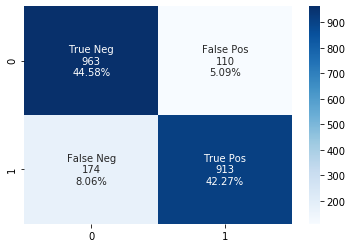

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten()/np.sum(matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

#### Matriz de Confusão - Cross Validation

In [35]:
matrix_cv = confusion_matrix(ytest, y_pred_rfc)

In [36]:
matrix_cv

array([[972, 101],
       [192, 895]])

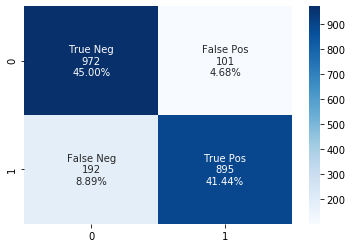

In [37]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in matrix_cv.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in matrix_cv.flatten()/np.sum(matrix_cv)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix_cv, annot=labels, fmt='', cmap='Blues')

### TESTE Não validados

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [57]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(Xtest)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [68]:
def predictKNN(new_text):
    article = [new_text]
    # transform song into vector matrix
    new_article_vecs = cv.transform(article)
    ynew = new_article_vecs.todense()

    prediction = knn.predict(ynew)
    
    return prediction

In [71]:
predictKNN(TXT_UOL)

array([0])

In [76]:
News = """O presidente Jair Bolsonaro (PL) visitou hoje a 48ª edição da Expoingá, uma feira agropecuária que acontece em Maringá, no Paraná. Ele aproveitou a oportunidade para discursar em tom de campanha e realizar uma motociata com seus apoiadores.Sem pedir votos, o presidente voltou a falar sobre a necessidade de eleições limpas e transparentes - o que o TSE (Tribunal Superior Eleitoral) já garantiu repetidas vezes que está assegurado - e de forma indireta colocou em dúvida a credibilidade das pesquisas eleitorais."Essa maneira como fui recebido aqui, como em qualquer outro lugar do Brasil, é a verdadeira pesquisa popular", disse Bolsonaro, que aparece em segundo lugar em todos os levantamentos realizados até agora, atrás do ex-presidente Luiz Inácio Lula da Silva (PT).Em sua fala, Bolsonaro repetiu o que costuma falar em todos os seus discursos, como a crítica às políticas de isolamento durante a pandemia de covid-19 e a responsabilização dos governadores pelo aumento do preço dos combustíveis, o que não procede.Desta vez, um dos assuntos com maior destaque entre os abordados por ele foi a questão do armamento. O presidente defendeu que mais pessoas tenham acesso a armas de fogo, o que suscitou gritos de "mito" da plateia."O povo de bem armado jamais será escravizado. Somente os ditadores temem o povo armado", defendeu. "Eu quero que todo cidadão de bem possua sua arma de fogo para resistir, se for o caso, à tentação de um ditador de plantão", completou.No evento, estava sentado ao seu lado o general Walter Braga Netto, que é ex-ministro da Defesa e atualmente não tem cargo no governo federal porque deve ser o candidato a vice na chapa de Bolsonaro.Para chegar até o local da Expoingá, Bolsonaro realizou uma motociata com seus apoiadores, o que aconteceu de tarde, durante o horário de expediente do presidente.O passeio foi transmitido pelas redes sociais de Bolsonaro e durou pouco menos de 15 minutos. Ao descer da moto, ele cumprimentou e tirou fotos com as pessoas que estavam ao redor."""

### Classificador Regressão Logistica

In [77]:
predict(News)

array([0])

### Classificador Árvore de Decisão

In [78]:
predictDecTreeClass(News)

array([1])

### Classificador Floresta Aleatória

In [81]:
predict_model_rf = rfc.predict(Xtrain)

In [82]:
print(classification_report(ytrain, predict_model_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2527
           1       1.00      1.00      1.00      2513

    accuracy                           1.00      5040
   macro avg       1.00      1.00      1.00      5040
weighted avg       1.00      1.00      1.00      5040



In [87]:
predictRandForClass(News)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

 ### Classificador K-vizinho mais próximo (KNN)

In [80]:
predictKNN(News)

array([0])

In [89]:
forest_fc = RandomForestClassifier()

In [104]:
from sklearn.model_selection import RandomizedSearchCV

param_space = {
    "bootstrap": [True],
    "max_depth": [6, 8, 10, 12, 14],
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_leaf": [2, 3, 4],
    "min_samples_split": [2, 3, 4, 5],
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

forest_random_search = RandomizedSearchCV(forest_fc, param_space, n_iter=32, scoring="accuracy",
                                          verbose=True, cv=5, n_jobs=1, random_state=42)


forest_fc.fit(Xtrain, ytrain)

RandomForestClassifier()

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV

param_space = {
    "bootstrap": [True],
    "max_depth": [6, 8, 10, 12, 14],
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_leaf": [2, 3, 4],
    "min_samples_split": [2, 3, 4, 5],
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

busca = RandomizedSearchCV(RandomForestClassifier(),
                    param_space,
                    n_iter=2,
                    cv = KFold(n_splits = 5, shuffle=True), random_state=42)

busca.fit(Xtrain, ytrain)

scores = cross_val_score(busca, X, y, cv = KFold(n_splits=5, shuffle=True))
scores

KeyboardInterrupt: 

In [103]:
forest_random_search.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [100]:
forest_fc.predict(Xtrain)

array([1, 1, 1, ..., 0, 0, 1])

- https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501